In [1]:
# !pip install tensorflow-gpu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.keras
import keras
from glob import glob
from sklearn.model_selection import train_test_split
import cv2
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import shutil
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from numpy.random import randn
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2DTranspose
from numpy.random import randn
from numpy import vstack

Using TensorFlow backend.


### Loading Images

In [0]:
images = glob('train/images/Asparagus + dumpling/*.jpg')
data = []
for f1 in range(len(images)):
    img = cv2.imread(images[f1])[:,:,::-1]
    data.append(img)
    
len(data)

28

In [0]:
input_data = np.array(data)
trainX, testX = train_test_split(input_data,random_state = 42, test_size = 0.2)
input_data.shape

(28, 480, 640, 3)

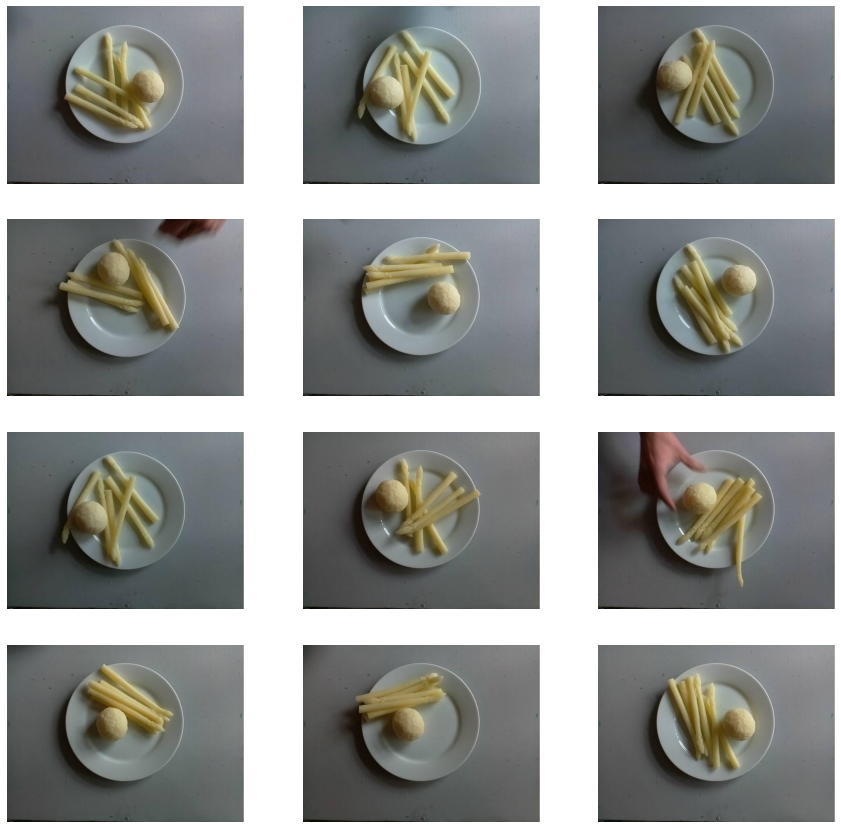

In [0]:
fig=plt.figure(figsize=(15, 15))
columns = 3
rows = 4
for i in range(rows*columns): 
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(trainX[i])
    plt.axis('off')
plt.show()

In [0]:
tf.keras.backend.clear_session()

trainX.shape

(22, 480, 640, 3)

In [0]:
# define the standalone discriminator model
def define_discriminator(in_shape=(480,640,3)):
    model = Sequential()
    model.add(Conv2D(16, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(32, (3,3), strides=(2, 2), padding='same', ))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same',))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same',))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# load and prepare mnist training images
def load_real_samples(trainX):
    X = trainX
    # convert from unsigned ints to floats
    X = X.astype('float32')
    # scale from [0,255] to [0,1]
    X = X / 255.0
    return X

# select real samples
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = ones((n_samples, 1))
    return X, y

# generate n fake samples with class labels
def generate_fake_samples(n_samples):
    # generate uniform random numbers in [0,1]
    X = rand(480 * 640 * 3 * n_samples)
    # reshape into a batch of grayscale images
    X = X.reshape((n_samples, 480, 640, 3))
    # generate 'fake' class labels (0)
    y = zeros((n_samples, 1))
    return X, y

# train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=6):
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_iter):
        # get randomly selected 'real' samples
        X_real, y_real = generate_real_samples(dataset, half_batch)
        # update discriminator on real samples
        _, real_acc = model.train_on_batch(X_real, y_real)
        # generate 'fake' examples
        X_fake, y_fake = generate_fake_samples(half_batch)
        # update discriminator on fake samples
        _, fake_acc = model.train_on_batch(X_fake, y_fake)
        # summarize performance
        print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples(trainX)
# fit the model
train_discriminator(model, dataset)

>1 real=33% fake=0%
>2 real=67% fake=33%
>3 real=67% fake=67%
>4 real=67% fake=33%
>5 real=100% fake=67%
>6 real=33% fake=67%
>7 real=33% fake=67%
>8 real=33% fake=100%
>9 real=33% fake=67%
>10 real=33% fake=100%
>11 real=0% fake=67%
>12 real=67% fake=100%
>13 real=0% fake=67%
>14 real=0% fake=100%
>15 real=0% fake=100%
>16 real=67% fake=67%
>17 real=67% fake=100%
>18 real=33% fake=100%
>19 real=67% fake=100%
>20 real=33% fake=100%
>21 real=33% fake=100%
>22 real=33% fake=100%
>23 real=0% fake=100%
>24 real=33% fake=100%
>25 real=0% fake=67%
>26 real=33% fake=100%
>27 real=67% fake=100%
>28 real=0% fake=67%
>29 real=33% fake=100%
>30 real=33% fake=100%
>31 real=33% fake=100%
>32 real=67% fake=100%
>33 real=33% fake=67%
>34 real=33% fake=100%
>35 real=33% fake=100%
>36 real=33% fake=67%
>37 real=67% fake=100%
>38 real=67% fake=100%
>39 real=33% fake=100%
>40 real=67% fake=67%
>41 real=67% fake=100%
>42 real=67% fake=100%
>43 real=100% fake=100%
>44 real=100% fake=100%
>45 real=67% fake=

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 320, 16)      448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 240, 320, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 240, 320, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 160, 32)      4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 120, 160, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 80, 64)        1

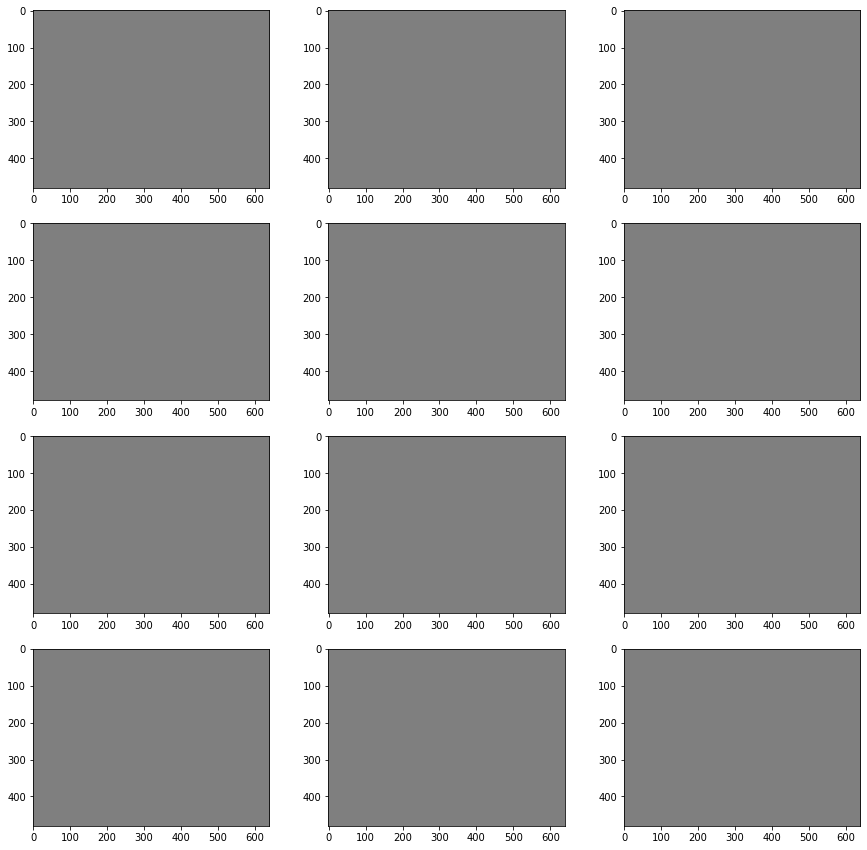

In [0]:
# define the standalone generator model
def define_generator(latent_dim):
    model = Sequential()
    # foundation for 7x7 image
    n_nodes = 512 * 15 * 20
    model.add(Dense(n_nodes, input_dim=(latent_dim*latent_dim*3)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((15, 20, 512)))
    model.add(Dropout(0.4))
    
    model.add(Conv2DTranspose(256, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    # upsample to 14x14
    model.add(Conv2DTranspose(32, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    # upsample to 28x28
    model.add(Conv2DTranspose(8, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(3, (7,7), activation='sigmoid', padding='same'))
    return model

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples * 3 * latent_dim)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim * latent_dim * 3)
    return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create 'fake' class labels (0)
    y = zeros((n_samples, 1))
    return X, y

# size of the latent space
latent_dim = 20
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 14
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples

fig=plt.figure(figsize=(15, 15))
columns = 3
rows = 4
for i in range(rows*columns): 
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(X[i,:,:,:])
# show the figure
plt.show()

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 153600)            184473600 
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 153600)            0         
_________________________________________________________________
reshape (Reshape)            (None, 15, 20, 512)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 20, 512)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 30, 40, 256)       2097408   
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 30, 40, 256)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 40, 256)      

In [0]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(g_model)
    # add the discriminator
    model.add(d_model)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

# size of the latent space
latent_dim = 20
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 480, 640, 3)       187264643 
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 116641    
Total params: 187,381,284
Trainable params: 187,264,643
Non-trainable params: 116,641
_________________________________________________________________


In [0]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=100, n_batch=256):
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_batch)
        # create inverted labels for the fake samples
        y_gan = ones((n_batch, 1))
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan)

In [0]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
    # plot images
    fig=plt.figure(figsize=(15, 15))
    columns = 3
    rows = 5
    for i in range(1,rows*columns+1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(examples[i])
    # save plot to file
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    plt.savefig(filename)
    plt.close()

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
    # prepare real samples
    X_real, y_real = generate_real_samples(dataset, n_samples)
    # evaluate discriminator on real examples
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    # evaluate discriminator on fake examples
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    # save plot
    save_plot(x_fake, epoch)
    # save the generator model tile file
    filename = 'generator_model_%03d.h5' % (epoch + 1)
    g_model.save(filename)

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=301, n_batch=22):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    # bat_per_epo = 4
    half_batch = int(n_batch / 2)
    # half_batch = 10
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # create training set for the discriminator
            X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
            # update discriminator model weights
            d_loss, _ = d_model.train_on_batch(X, y)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
        # evaluate the model performance, sometimes
        if (i+1) % 50 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)


# size of the latent space
latent_dim = 20
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples(trainX)
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

>1, 1/1, d=0.676, g=0.687
>2, 1/1, d=0.719, g=0.717
>3, 1/1, d=0.702, g=0.758
>4, 1/1, d=0.642, g=0.764
>5, 1/1, d=0.681, g=0.794
>6, 1/1, d=0.656, g=0.785
>7, 1/1, d=0.697, g=0.798
>8, 1/1, d=0.661, g=0.850
>9, 1/1, d=0.670, g=0.826
>10, 1/1, d=0.672, g=0.889
>11, 1/1, d=0.664, g=0.890
>12, 1/1, d=0.675, g=0.903
>13, 1/1, d=0.643, g=0.901
>14, 1/1, d=0.661, g=0.935
>15, 1/1, d=0.638, g=0.913
>16, 1/1, d=0.605, g=0.912
>17, 1/1, d=0.602, g=0.915
>18, 1/1, d=0.618, g=0.911
>19, 1/1, d=0.563, g=0.886
>20, 1/1, d=0.585, g=0.953
>21, 1/1, d=0.567, g=1.010
>22, 1/1, d=0.541, g=1.064
>23, 1/1, d=0.580, g=0.932
>24, 1/1, d=0.535, g=0.829
>25, 1/1, d=0.533, g=0.688
>26, 1/1, d=0.495, g=0.574
>27, 1/1, d=0.496, g=0.513
>28, 1/1, d=0.645, g=0.678
>29, 1/1, d=0.595, g=0.861
>30, 1/1, d=0.526, g=0.715
>31, 1/1, d=0.527, g=0.640
>32, 1/1, d=0.584, g=0.702
>33, 1/1, d=0.531, g=0.606
>34, 1/1, d=0.509, g=0.599
>35, 1/1, d=0.484, g=0.646
>36, 1/1, d=0.693, g=0.555
>37, 1/1, d=0.777, g=0.619
>38, 1/1, 

In [0]:
### Loading the trained model weights

In [0]:
# load weights
model.load_weights("./generator_model_50000.h5")
# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

Created model and loaded weights from file


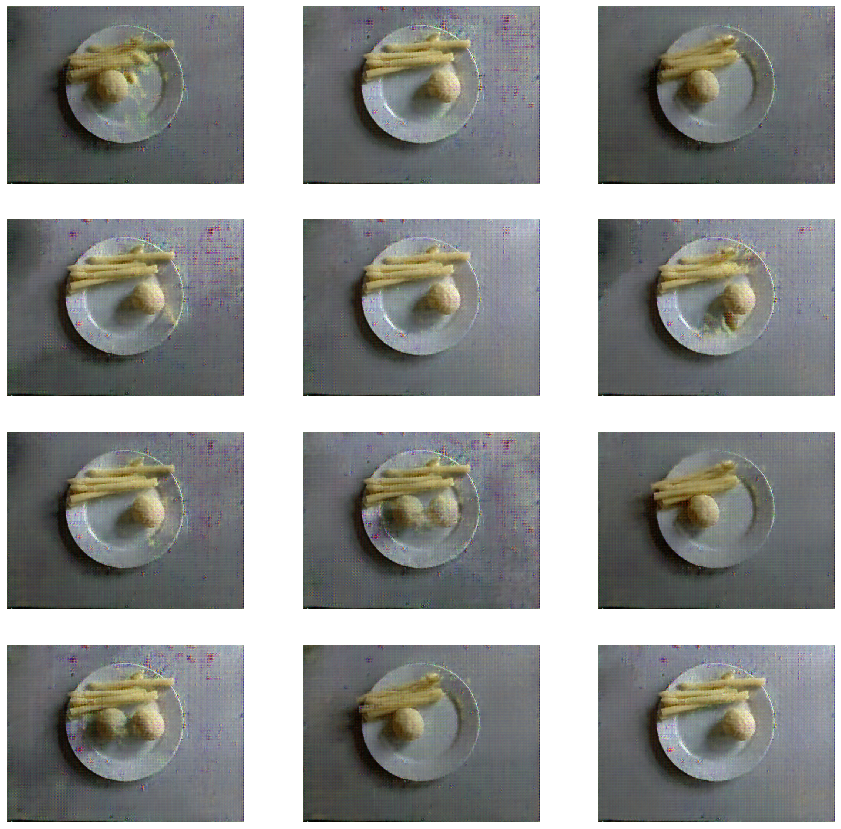

In [0]:
x_input = randn(latent_dim * n_samples * 3 * latent_dim)
# reshape into a batch of inputs for the network
x_input = x_input.reshape(n_samples, latent_dim * latent_dim * 3)

output_x = model.predict(x_input)

fig=plt.figure(figsize=(15, 15))
columns = 3
rows = 4
for i in range(rows*columns): 
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(output_x[i])
    plt.axis('off')
plt.show()